In [355]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [228]:
#pd.read_excel("ACT_Report_3.xlsm", sheet_name = "S_Ans")

In [194]:
m_ans = pd.read_excel("ACT_Report_3.xlsm", sheet_name = "M_Ans")

In [195]:
m_ans= m_ans.T
header = m_ans.iloc[0]
m_ans = m_ans[1:]
m_ans = m_ans.rename(columns = header)
m_ans.index = range(0,50)

In [233]:
len(m_ans["Key"])

50

In [191]:
sd_ans=pd.read_csv("P01_Answers.csv").T

In [ ]:
sd_ans.index = range(0,50)

In [197]:
header=sd_ans.iloc[0]
sd_ans = sd_ans[1:51]
sd_ans = sd_ans.rename(columns = header)


In [200]:
sd_ans.index =  range(0,50)
sd_ans.head()

,461,207,480
0,B,B,B
1,B,C,C
2,A,B,B
3,A,B,B
4,C,B,A


In [266]:
def test_grader(ans,sd_ans):
    index = []
    df = ans.copy()
    for num in range(len(ans["Key"])):
        record = []
        ans = m_ans.iloc[num,0]
        if sd_ans.iloc[num,0] == ans:
            record.append(True)
            index.append(record)
        else:
            record.append(False)
            index.append(record)
    df_index = pd.DataFrame(index, columns = ["Grade"])
    df['Grade']=df_index['Grade']
    df = df 
    grade=pd.DataFrame(df['Grade'].value_counts())
    grade["Ans"] = ["Right", 'Wrong']
    return df, grade

In [267]:
df, grade = test_grader(m_ans, sd_ans)

In [268]:
grade

,Grade,Ans
True,35,Right
False,15,Wrong


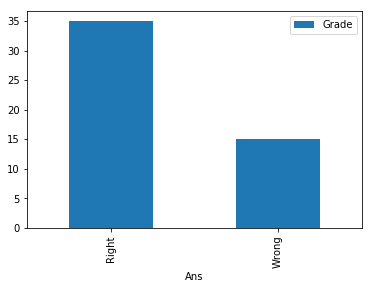

In [269]:
grade.plot(kind='bar', x='Ans',  y='Grade')

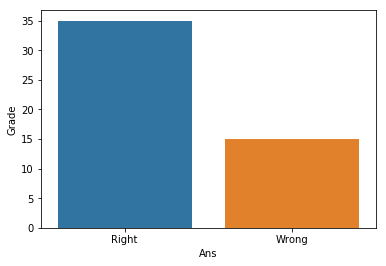

In [270]:
sns.barplot(x="Ans", y="Grade", data = grade) 

In [357]:
df = pd.read_excel("Prestige_ACT_TEST_REPORT.xlsm", sheet_name = "Sheet1")

In [290]:
mean = pd.DataFrame(df.describe().loc["mean",["English", "Math", "Reading", "Science", "Composite Score"]])

In [295]:
mean["subject"] = mean.index
mean.index = range(len(mean.index))

In [335]:
mean

,mean,subject
0,30.034483,English
1,31.568966,Math
2,26.534483,Reading
3,27.051724,Science
4,28.810345,Composite Score


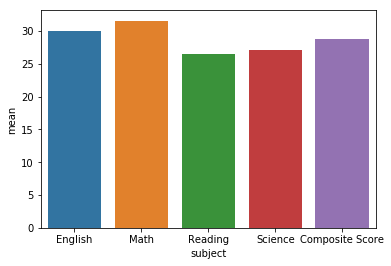

In [297]:
sns.barplot(x="subject", y="mean", data = mean)

In [359]:
df_sd = df.loc[:,["Name","English", "Math", "Reading", "Science", "Composite Score"] ]

In [324]:
new_sd=df_sd.T

In [328]:
col=new_sd.iloc[0]

In [329]:
new_sd=new_sd[1:]

In [330]:
new_sd.columns = col

In [332]:
new_sd["subject"] = new_sd.index

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [343]:
new_sd.columns

Index(['Trystan Ng', 'Jieun Oh ', 'Howard Haughton ', 'Cloudia Kim ',
       'Daniel Hwang ', 'subject'],
      dtype='object', name='Name')

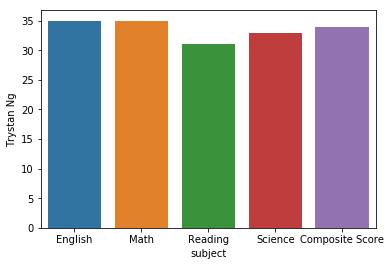

In [346]:
sns.barplot(x="subject", y="Trystan Ng", data = new_sd)

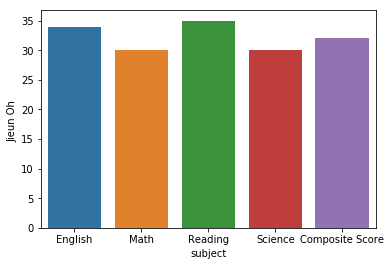

In [347]:
sns.barplot(x="subject", y='Jieun Oh ', data = new_sd)

,Name,English,Math,Reading,Science,Composite Score
0,Trystan Ng,35,35,31,33,34
1,Jieun Oh,34,30,35,30,32
2,Howard Haughton,34,36,32,34,34
3,Cloudia Kim,31,31,28,25,29
4,Daniel Hwang,24,35,24,28,28


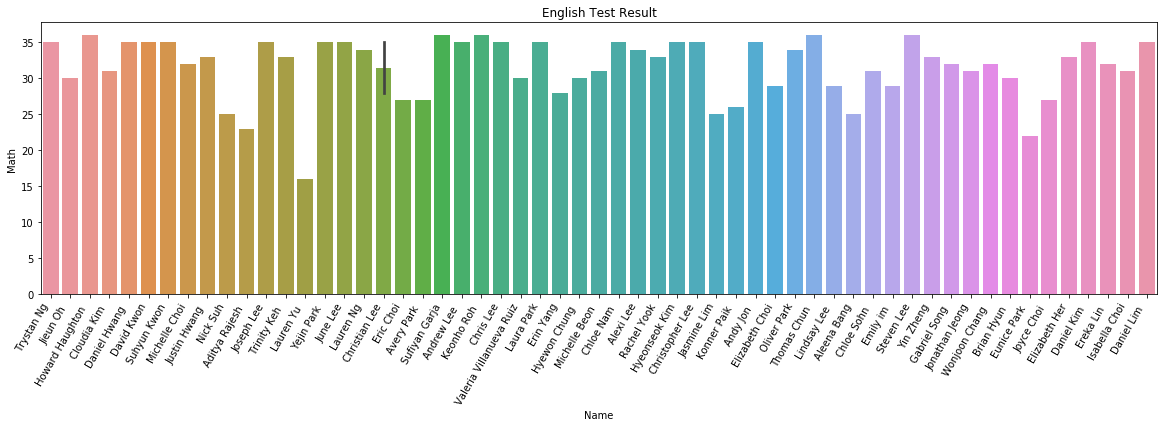

In [362]:
plt.figure(figsize=(20,5))
plt.title('English Test Result')
plt.xticks(rotation=60, ha='right')
sns.barplot(x="Name", y='Math', data = df_sd)